In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('HAR_cleaned.csv')
df.head()

subjectID  timestamp  IMUH_temp  IMUH_acc1  IMUH_acc2  IMUH_acc3  \
0        101      37.66     30.375    2.21530    8.27915    5.58753   
1        101      37.67     30.375    2.29196    7.67288    5.74467   
2        101      37.68     30.375    2.29090    7.14240    5.82342   
3        101      37.69     30.375    2.21800    7.14365    5.89930   
4        101      37.70     30.375    2.30106    7.25857    6.09259   

   IMUH_gyr1  IMUH_gyr2  IMUH_gyr3  IMUH_mag1  IMUH_mag2  IMUH_mag3  \
0  -0.004750   0.037579  -0.011145    8.93200   -67.9326   -19.9755   
1  -0.171710   0.025479  -0.009538    9.58300   -67.9584   -20.9091   
2  -0.238241   0.011214   0.000831    9.05516   -67.4017   -19.5083   
3  -0.192912   0.019053   0.013374    9.92698   -67.4387   -20.5602   
4  -0.069961  -0.018328   0.004582    9.15626   -67.1825   -20.0857   

   IMUC_temp  IMUC_acc1  IMUC_acc2  IMUC_acc3  IMUC_gyr1  IMUC_gyr2  \
0    32.1875   0.124482    9.65003   -1.65181   0.036668   0.016559   
1    32.1875   0.200711    9.64980   -1.65043   0.019343  -0.024304   
2    32.1875   0.270277    9.72331   -1.88174  -0.001428   0.038466   
3    32.1875   0.236737    9.72447   -1.72746   0.017277  -0.048547   
4    32.1875   0.352225    9.72437   -1.68665   0.000275  -0.013352   

   IMUC_gyr3  IMUC_mag1  IMUC_mag2  IMUC_mag3  IMUA_temp  IMUA_acc1  \
0  -0.052791   0.567566   -50.7269    44.2728      30.75    9.73855   
1  -0.059843   0.904990   -50.5080    43.5427      30.75    9.69762   
2  -0.046464   0.455480   -50.7209    44.0259      30.75    9.69633   
3  -0.074946   0.324284   -50.1544    43.6570      30.75    9.66370   
4  -0.039315   0.462317   -50.7110    42.9228      30.75    9.77578   

   IMUA_acc2  IMUA_acc3  IMUA_gyr1  IMUA_gyr2  IMUA_gyr3  IMUA_mag1  \
0   -1.84761   0.095156   0.002908  -0.027714   0.001752   -61.1081   
1   -1.88438  -0.020804   0.020882   0.000945   0.006007   -60.8916   
2   -1.92203  -0.059173  -0.035392  -0.052422  -0.004882   -60.3407   
3   -1.84714   0.094385  -0.032514  -0.018844   0.026950   -60.7646   
4   -1.88582   0.095775   0.001351  -0.048878  -0.006328   -60.2040   

   IMUA_mag2  IMUA_mag3  activityID  
0   -36.8636   -58.3696           1  
1   -36.3197   -58.3656           1  
2   -35.7842   -58.6119           1  
3   -37.1028   -57.8799           1  
4   -37.1225   -57.8847           1

In [3]:
df1 = df.copy()

In [4]:
df1.columns

Index(['subjectID', 'timestamp', 'IMUH_temp', 'IMUH_acc1', 'IMUH_acc2',
       'IMUH_acc3', 'IMUH_gyr1', 'IMUH_gyr2', 'IMUH_gyr3', 'IMUH_mag1',
       'IMUH_mag2', 'IMUH_mag3', 'IMUC_temp', 'IMUC_acc1', 'IMUC_acc2',
       'IMUC_acc3', 'IMUC_gyr1', 'IMUC_gyr2', 'IMUC_gyr3', 'IMUC_mag1',
       'IMUC_mag2', 'IMUC_mag3', 'IMUA_temp', 'IMUA_acc1', 'IMUA_acc2',
       'IMUA_acc3', 'IMUA_gyr1', 'IMUA_gyr2', 'IMUA_gyr3', 'IMUA_mag1',
       'IMUA_mag2', 'IMUA_mag3', 'activityID'],
      dtype='object')

### Target variable distribution

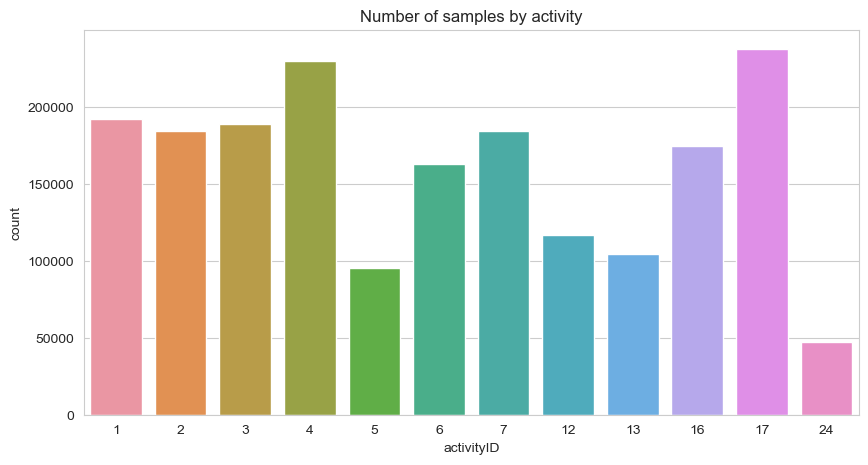

In [5]:
# aid = sns.countplot(x = df1['activityID'])

# plt.title('Imbalance in the Target Variable\n',fontsize=15)
# plt.xlabel('ActivityID',fontsize=10)
# plt.ylabel('Count',fontsize=10)
# plt.show()



sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
sns.countplot(x = 'activityID', data = df)
plt.title('Number of samples by activity')
plt.show()

### Numerical feature distribution

In [6]:
continuous = ['timestamp', 'IMUH_temp', 'IMUH_acc1', 'IMUH_acc2',
       'IMUH_acc3', 'IMUH_gyr1', 'IMUH_gyr2', 'IMUH_gyr3', 'IMUH_mag1',
       'IMUH_mag2', 'IMUH_mag3', 'IMUC_temp', 'IMUC_acc1', 'IMUC_acc2',
       'IMUC_acc3', 'IMUC_gyr1', 'IMUC_gyr2', 'IMUC_gyr3', 'IMUC_mag1',
       'IMUC_mag2', 'IMUC_mag3', 'IMUA_temp', 'IMUA_acc1', 'IMUA_acc2',
       'IMUA_acc3', 'IMUA_gyr1', 'IMUA_gyr2', 'IMUA_gyr3', 'IMUA_mag1',
       'IMUA_mag2', 'IMUA_mag3',] # all the otehr features are encoded categorical features, not continuous

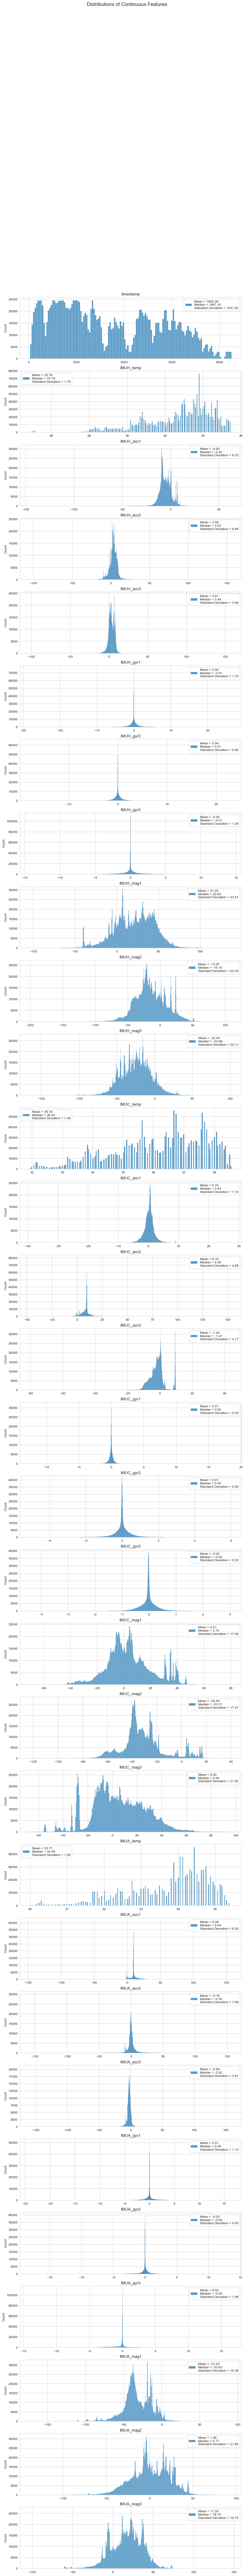

In [7]:
def plot_num_features(df, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(12, 4 * len(columns)))
    fig.suptitle("Distributions of Continuous Features", fontsize=15)

    for i, col in enumerate(columns):
        label = 'Mean = {}\nMedian = {}\nStandard Deviation = {}'.format(
            "{:.2f}".format(df[col].mean()),
            "{:.2f}".format(df[col].median()),
            "{:.2f}".format(df[col].std())
        )
        sns.histplot(x=df[col], ax=axes[i], label=label).legend(loc='best', fontsize=10)
        axes[i].set_title(f"{col}")
        axes[i].set_xlabel(None)

    plt.show()

plot_num_features(df1, continuous)

### Correlation

subjectID  timestamp  IMUH_temp  IMUH_acc1  IMUH_acc2  IMUH_acc3  \
subjectID    1.000000  -0.020847   0.152233  -0.031432  -0.281280  -0.002459   
timestamp   -0.020847   1.000000  -0.490635  -0.324483   0.038811  -0.213915   
IMUH_temp    0.152233  -0.490635   1.000000   0.059387  -0.052576   0.075700   
IMUH_acc1   -0.031432  -0.324483   0.059387   1.000000  -0.085183   0.259931   
IMUH_acc2   -0.281280   0.038811  -0.052576  -0.085183   1.000000  -0.066392   
IMUH_acc3   -0.002459  -0.213915   0.075700   0.259931  -0.066392   1.000000   
IMUH_gyr1   -0.026349   0.010400  -0.025175   0.019544   0.181293  -0.027289   
IMUH_gyr2    0.004554   0.047977  -0.024124  -0.093045  -0.007991  -0.024525   
IMUH_gyr3   -0.001736   0.002557  -0.001393   0.031129   0.017908  -0.084018   
IMUH_mag1    0.051553   0.336977  -0.094835  -0.510324  -0.043977  -0.193247   
IMUH_mag2    0.307573  -0.096594  -0.024711   0.057741  -0.431811   0.145643   
IMUH_mag3    0.032178   0.081725  -0.019605  -0.211443   0.103932  -0.507119   
IMUC_temp    0.249664  -0.079121   0.757001  -0.160242  -0.054577  -0.032468   
IMUC_acc1    0.054745  -0.029618   0.006029   0.020916   0.038381  -0.103062   
IMUC_acc2    0.054829   0.159868   0.034330  -0.424169   0.228767  -0.069866   
IMUC_acc3    0.159311  -0.470594   0.096013   0.438898  -0.119716   0.144280   
IMUC_gyr1   -0.001236   0.005246  -0.002041  -0.071162   0.059930   0.007890   
IMUC_gyr2    0.014292   0.025654  -0.014133  -0.047170   0.001847  -0.059291   
IMUC_gyr3   -0.011368  -0.020299   0.007087   0.078704   0.033872   0.031994   
IMUC_mag1    0.046822  -0.189765  -0.044802   0.250758  -0.051837   0.176034   
IMUC_mag2    0.084246  -0.368993  -0.002896   0.342420  -0.089075   0.199390   
IMUC_mag3   -0.094507   0.501113  -0.179027  -0.346107   0.055583  -0.137666   
IMUA_temp   -0.215046  -0.119171   0.496267  -0.134785   0.073368  -0.025934   
IMUA_acc1    0.003193   0.326682  -0.060704  -0.287963   0.048910  -0.160071   
IMUA_acc2   -0.013328   0.201005  -0.045060  -0.094532   0.111941  -0.069817   
IMUA_acc3   -0.143095   0.005451  -0.040735  -0.010946   0.008020   0.019989   
IMUA_gyr1    0.017007   0.000230   0.001185   0.038478  -0.004938   0.013492   
IMUA_gyr2   -0.007324  -0.041741   0.030173  -0.071584  -0.031040  -0.012994   
IMUA_gyr3   -0.002726  -0.003094   0.003408   0.093447  -0.037362   0.025275   
IMUA_mag1    0.192958  -0.308009   0.091216   0.084834  -0.048738   0.059817   
IMUA_mag2    0.104856  -0.237450   0.113318   0.209678  -0.095760   0.108525   
IMUA_mag3    0.045824  -0.042064   0.155197  -0.043391   0.041019  -0.011612   
activityID  -0.000805   0.144370   0.162190  -0.134185   0.038809  -0.117234   

            IMUH_gyr1  IMUH_gyr2  IMUH_gyr3  IMUH_mag1  IMUH_mag2  IMUH_mag3  \
subjectID   -0.026349   0.004554  -0.001736   0.051553   0.307573   0.032178   
timestamp    0.010400   0.047977   0.002557   0.336977  -0.096594   0.081725   
IMUH_temp   -0.025175  -0.024124  -0.001393  -0.094835  -0.024711  -0.019605   
IMUH_acc1    0.019544  -0.093045   0.031129  -0.510324   0.057741  -0.211443   
IMUH_acc2    0.181293  -0.007991   0.017908  -0.043977  -0.431811   0.103932   
IMUH_acc3   -0.027289  -0.024525  -0.084018  -0.193247   0.145643  -0.507119   
IMUH_gyr1    1.000000  -0.221345  -0.239397  -0.000029  -0.021727   0.011023   
IMUH_gyr2   -0.221345   1.000000   0.084921  -0.055096  -0.010877   0.002576   
IMUH_gyr3   -0.239397   0.084921   1.000000  -0.011546  -0.022053   0.004756   
IMUH_mag1   -0.000029  -0.055096  -0.011546   1.000000   0.102028   0.255279   
IMUH_mag2   -0.021727  -0.010877  -0.022053   0.102028   1.000000  -0.129736   
IMUH_mag3    0.011023   0.002576   0.004756   0.255279  -0.129736   1.000000   
IMUC_temp   -0.026796  -0.030531  -0.002198   0.112561  -0.046414   0.051453   
IMUC_acc1   -0.087289   0.055887   0.175124   0.021457   0.039376   0.105333   
IMUC_acc2    0.022841   0.039642  -0.062952   0.108067  -0.168447   0.112246   
IMUC_acc3  

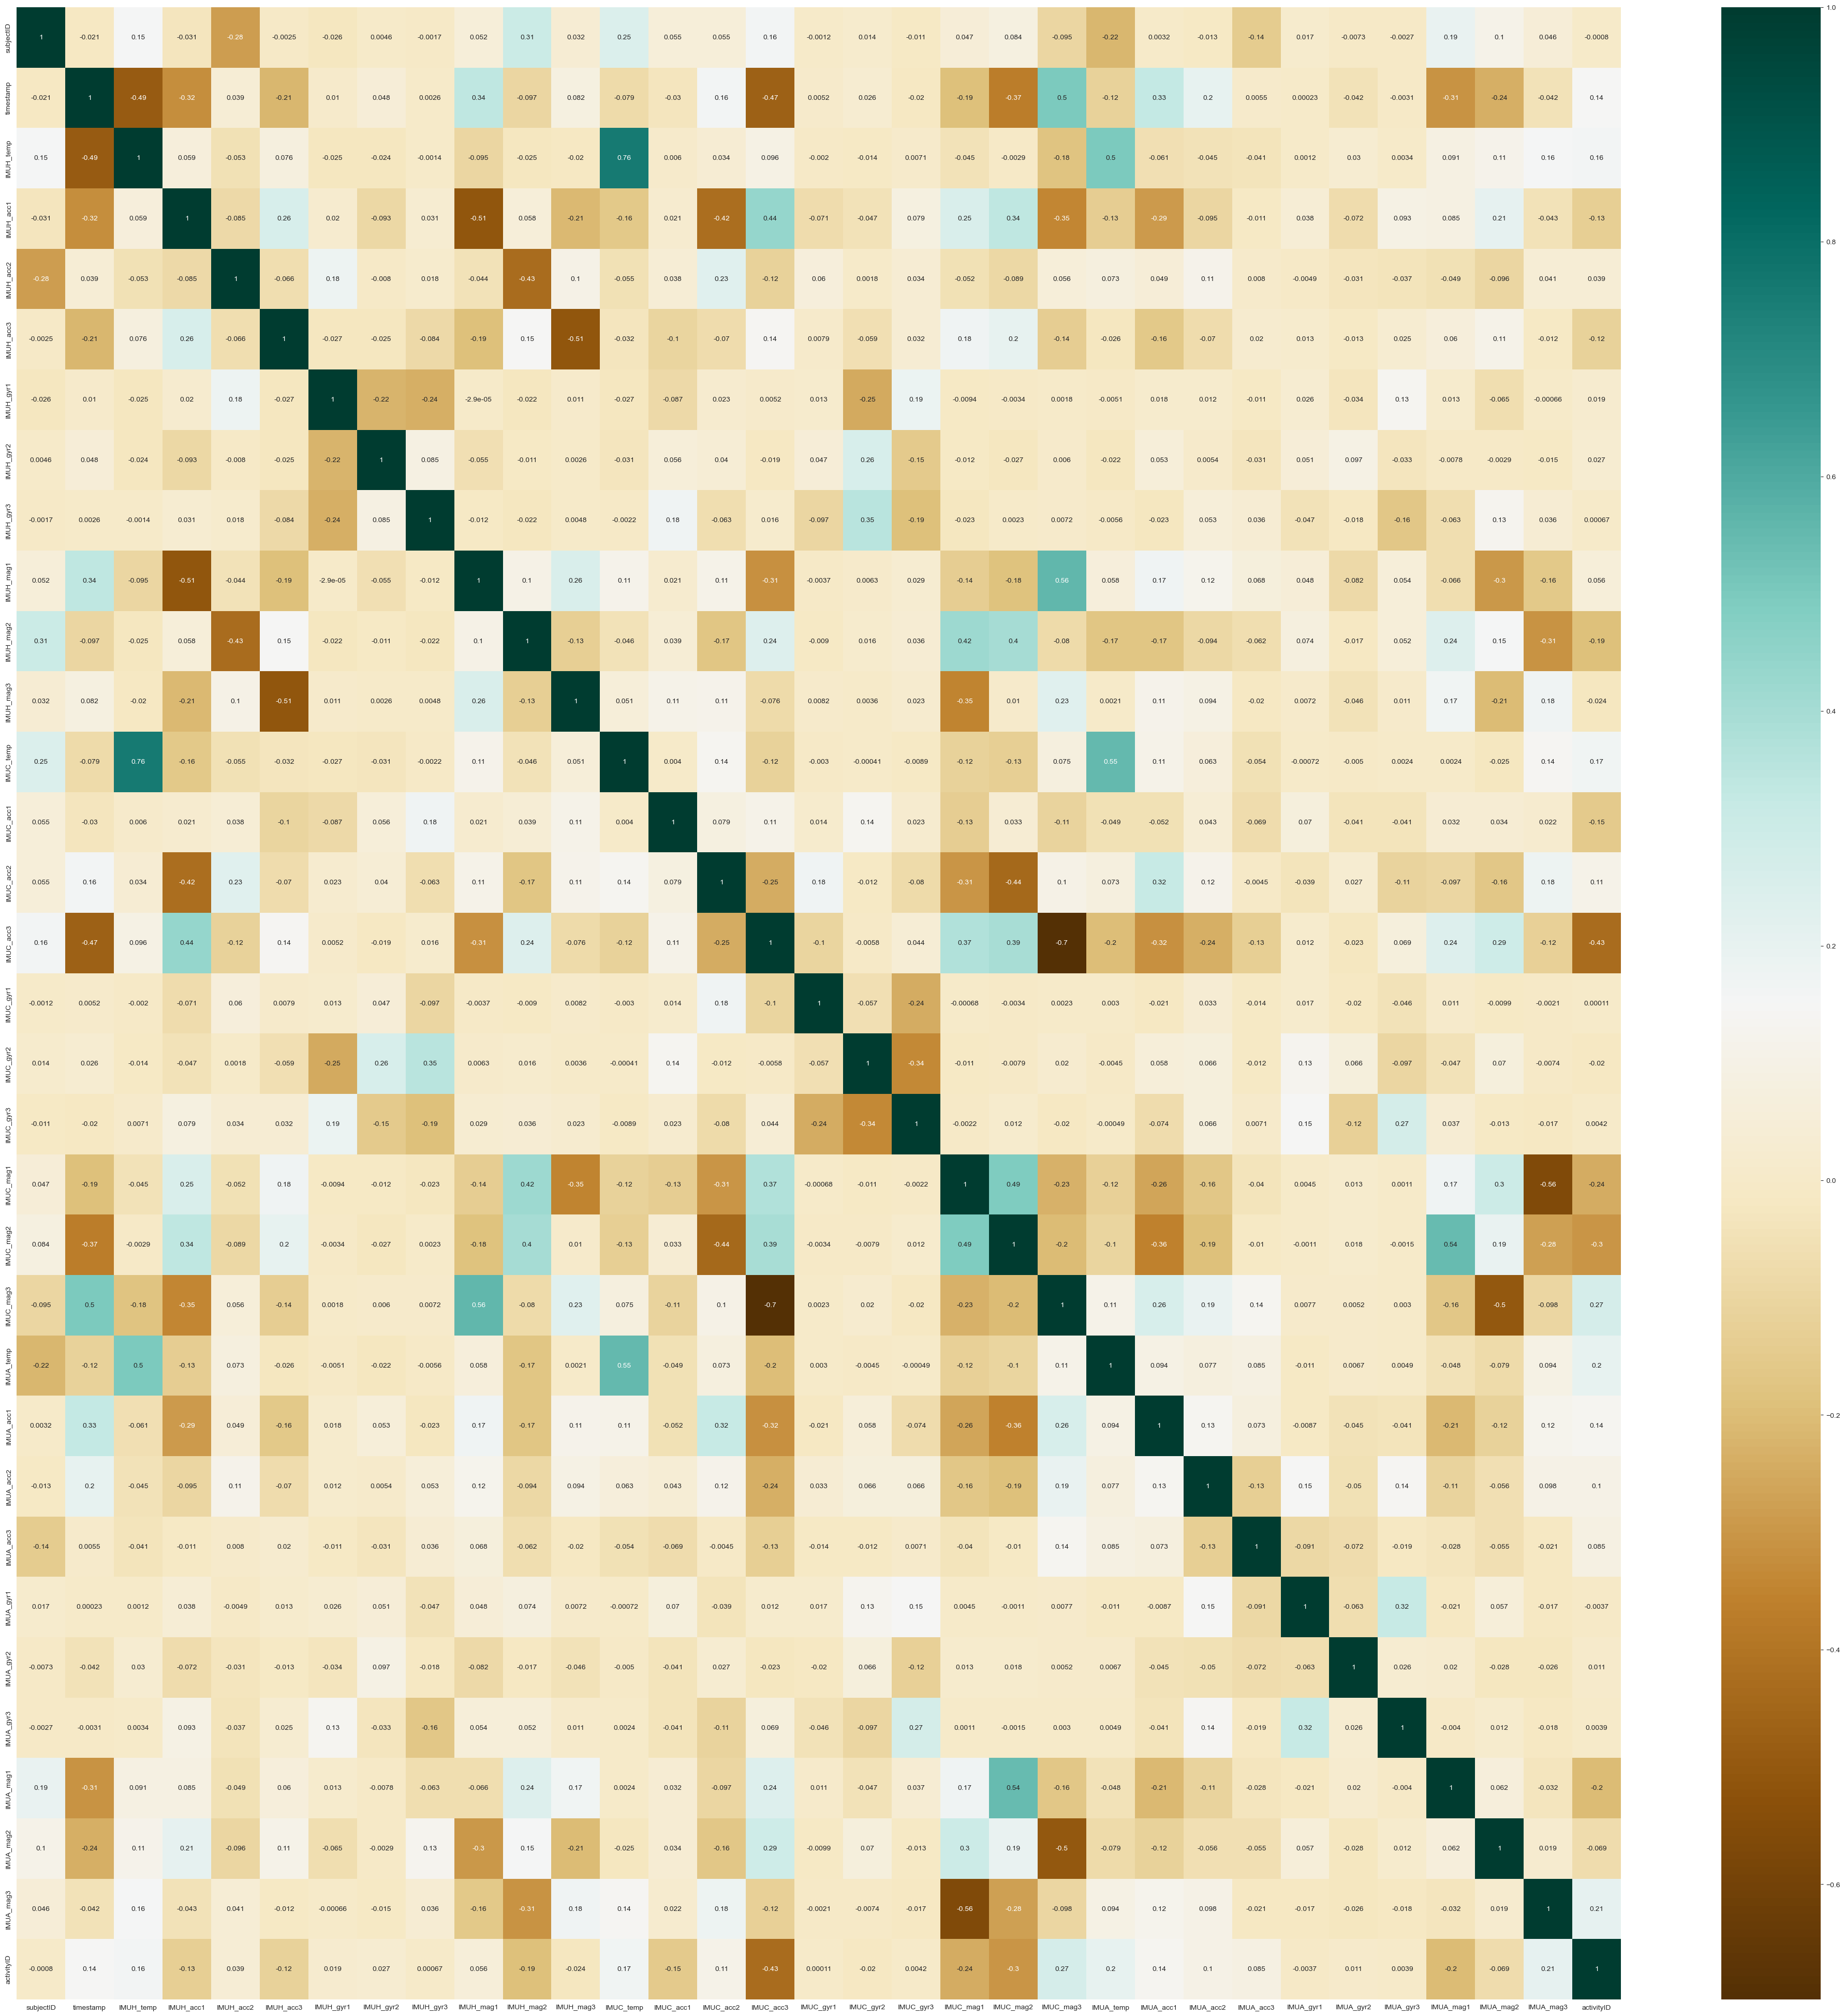

In [8]:
plt.figure(figsize=(50,50))
c= df1.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### p-significant features

In [9]:
# more significant features to target variable

target_variable = 'activityID'  
correlation_threshold = 0.05
c = df1.corr()
selected_features = c.index[c[target_variable].abs() < correlation_threshold].tolist()
print("Selected Feature Names:")
print(selected_features)

Selected Feature Names:
['subjectID', 'IMUH_acc2', 'IMUH_gyr1', 'IMUH_gyr2', 'IMUH_gyr3', 'IMUH_mag3', 'IMUC_gyr1', 'IMUC_gyr2', 'IMUC_gyr3', 'IMUA_gyr1', 'IMUA_gyr2', 'IMUA_gyr3']


### Noisy data - FFT

In [10]:
# for i in [1,2,3,4,5,6,7,12,13,16,17,24]: 
#     data = df1[(df1['subjectID'] == 101) & (df1['activityID'] == i)][:400]
#     plt.figure(figsize = (15, 6))
#     sns.lineplot(y = 'IMUH_acc1', x = 'timestamp', data = data)
#     sns.lineplot(y = 'IMUH_acc2', x = 'timestamp', data = data)
#     sns.lineplot(y = 'IMUH_acc3', x = 'timestamp', data = data)
#     plt.legend(['IMUH_acc1','IMUH_acc2','IMUH_acc3'])
#     plt.ylabel(i)
#     plt.title(i, fontsize = 15)
#     plt.show()

In [11]:
df2 = df.drop(['timestamp'], axis=1)

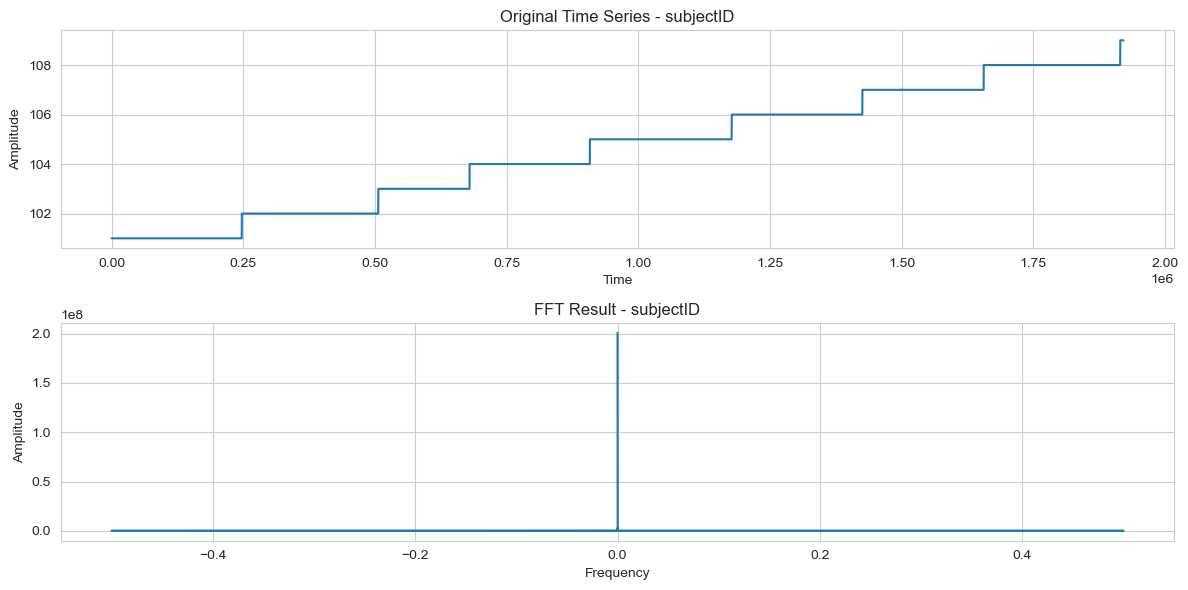

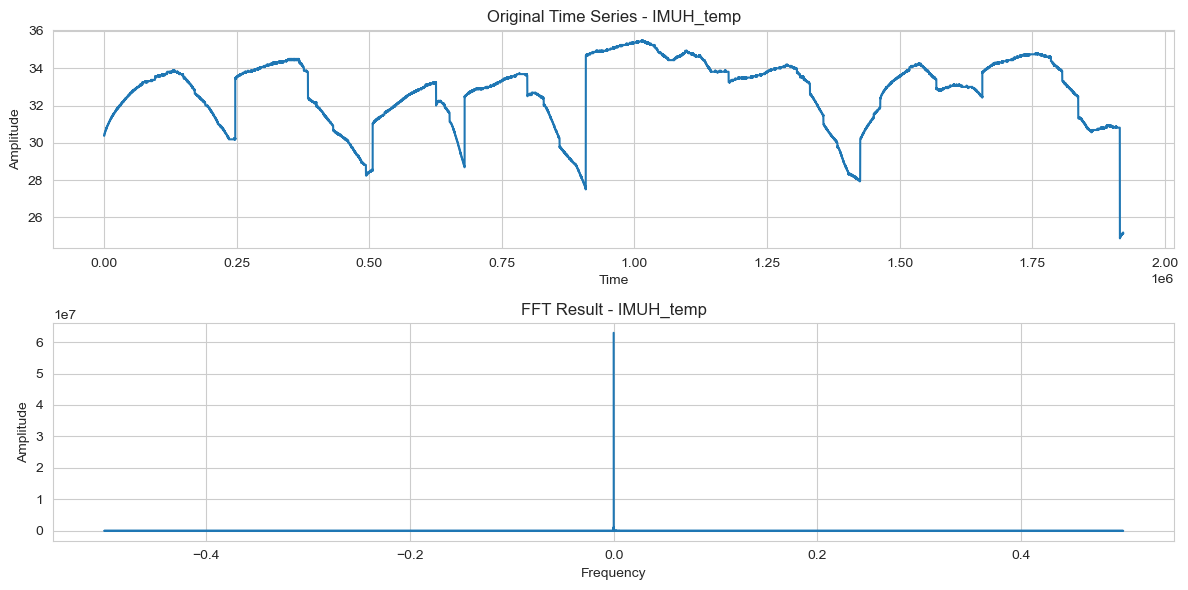

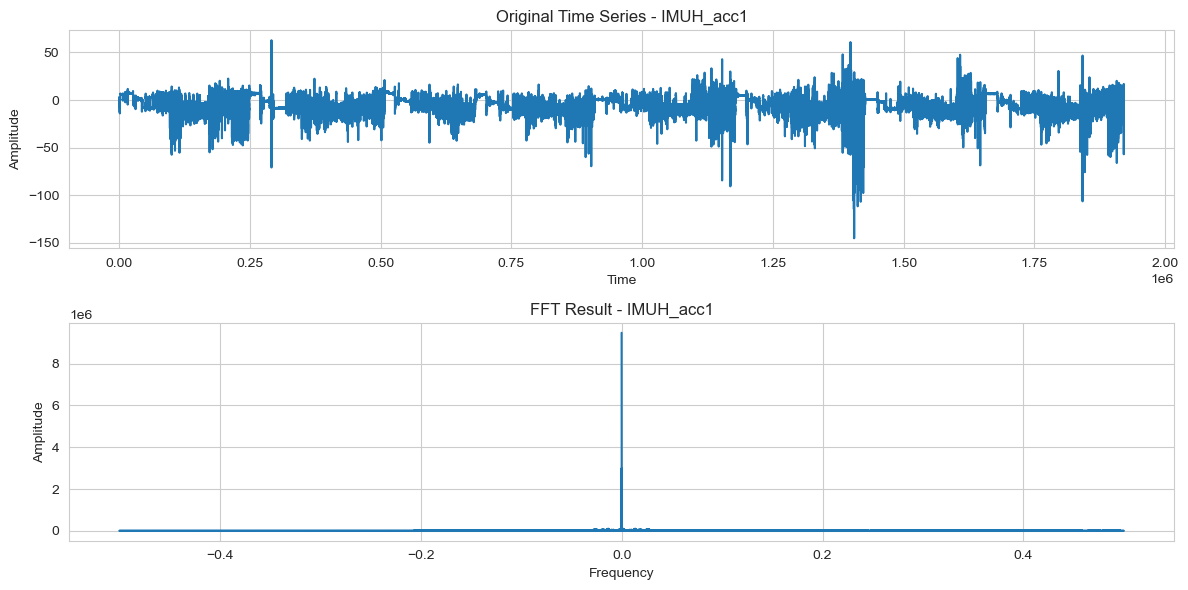

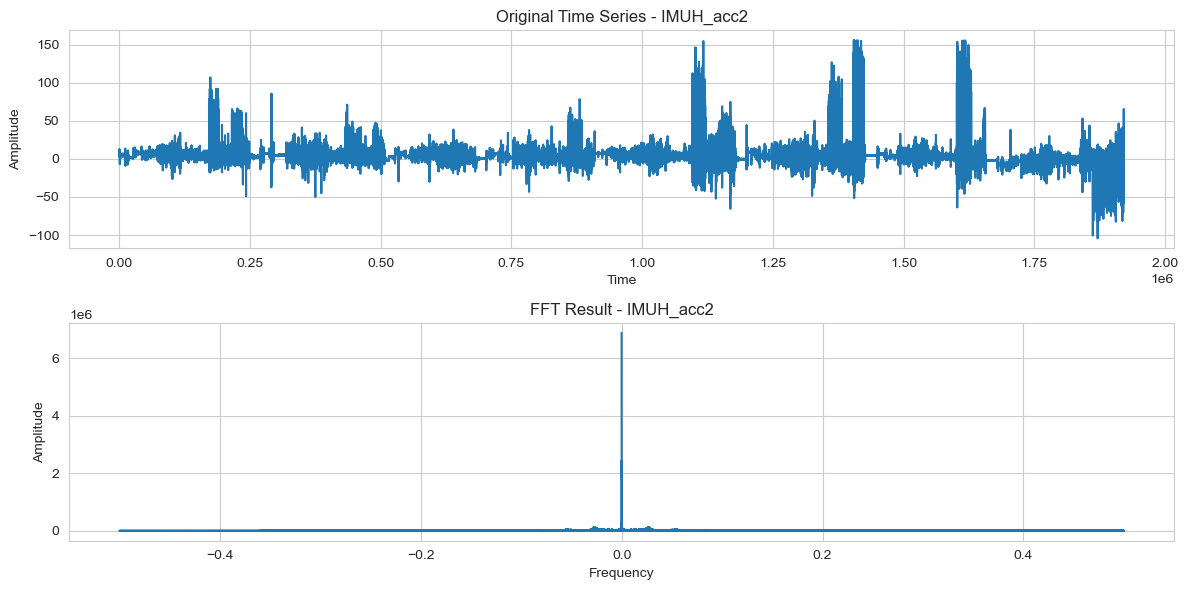

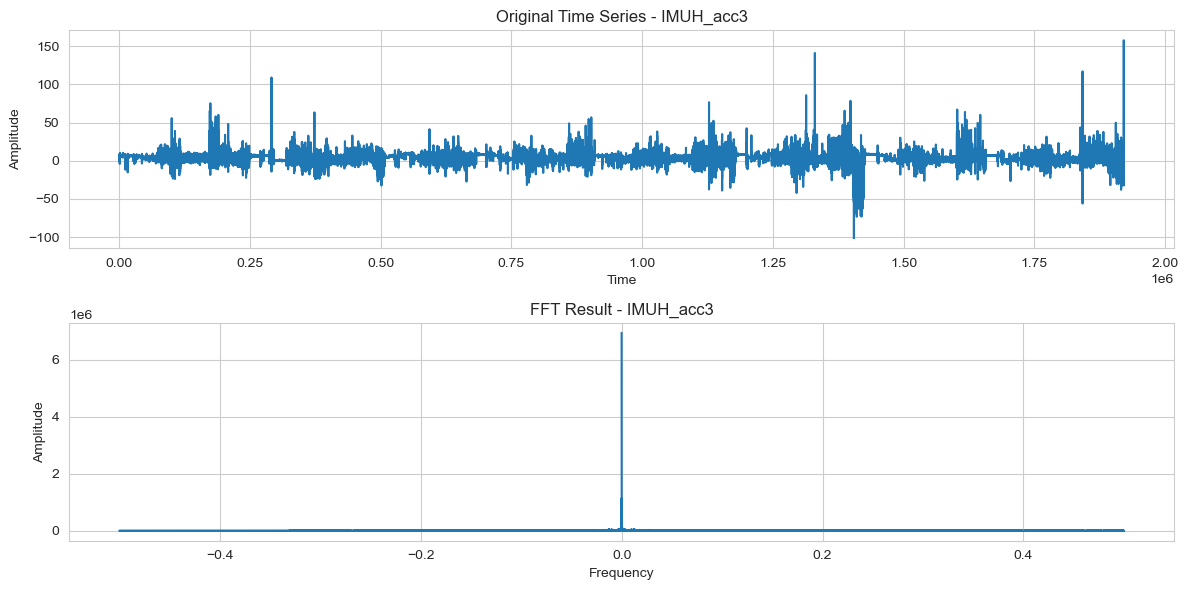

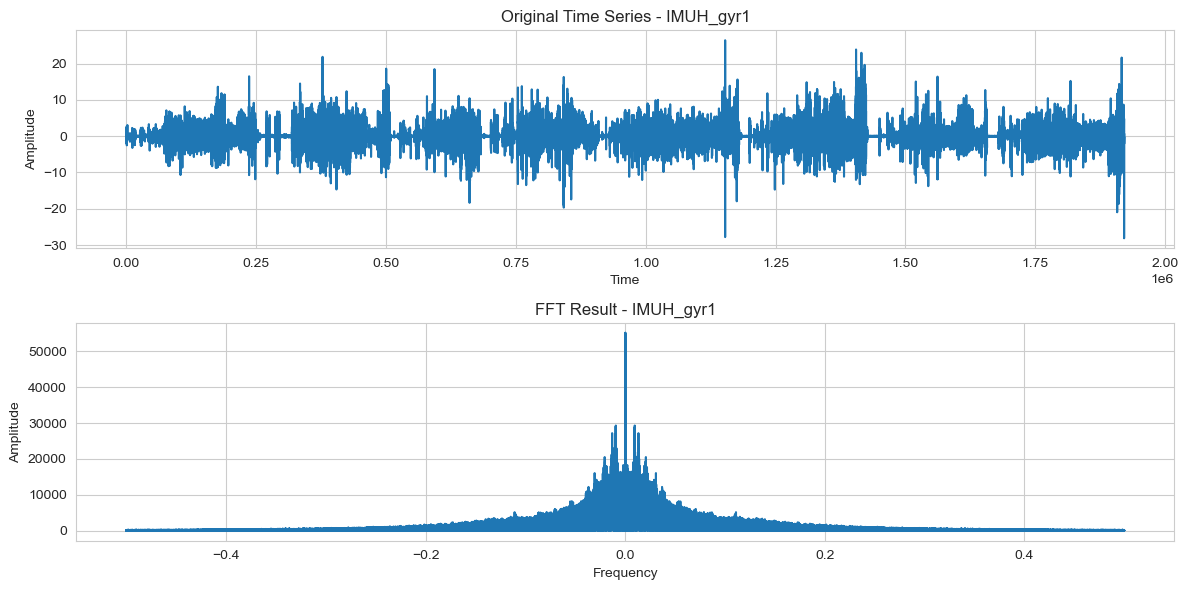

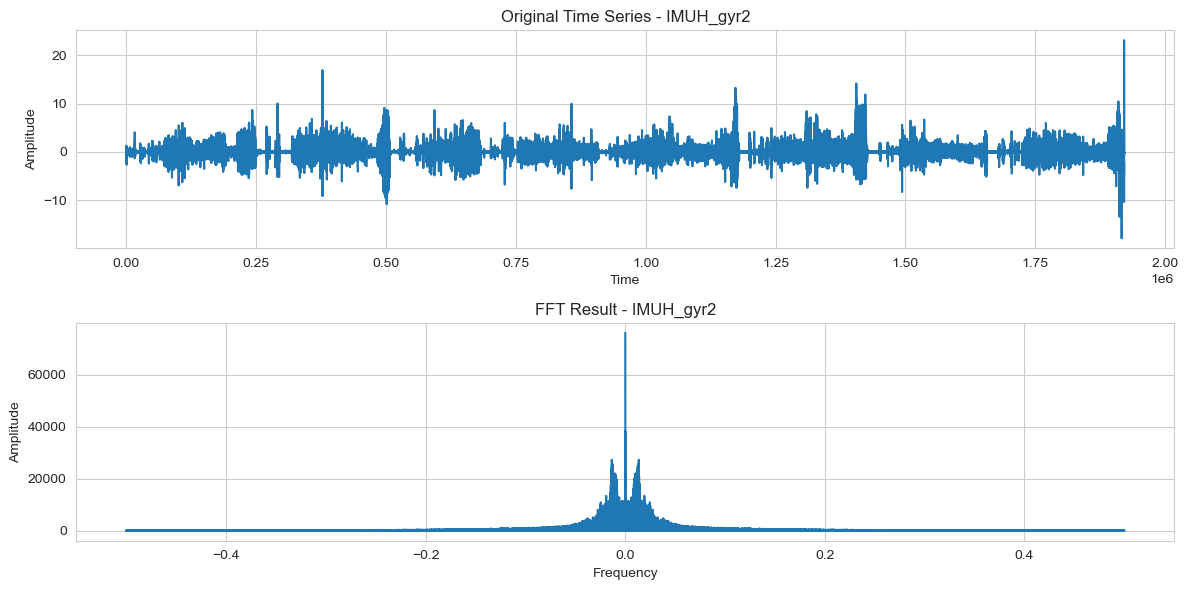

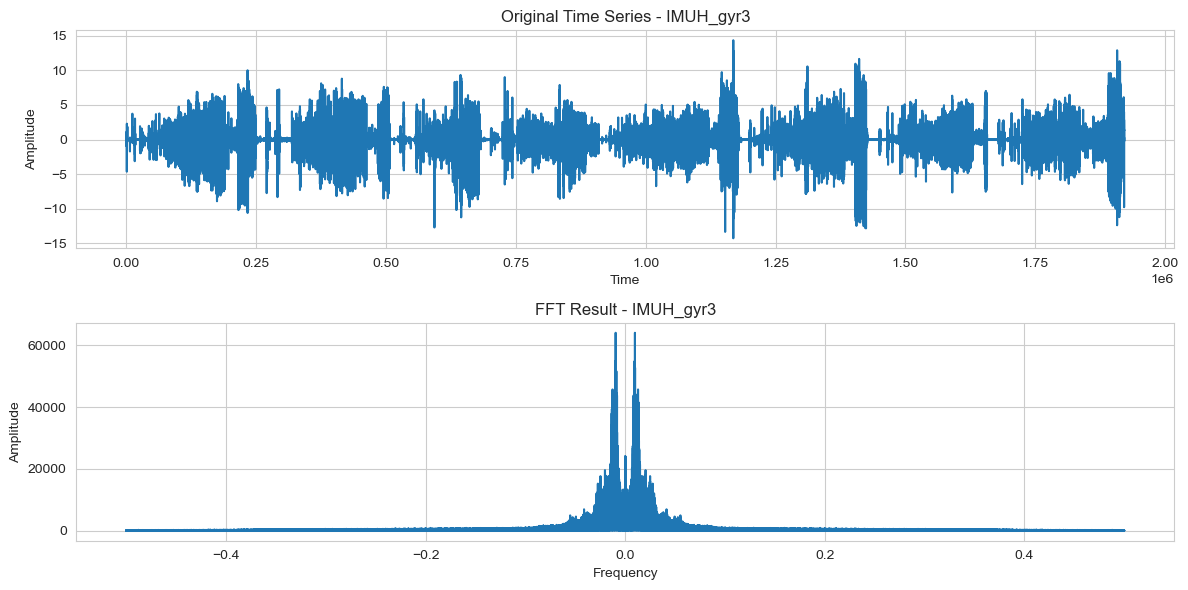

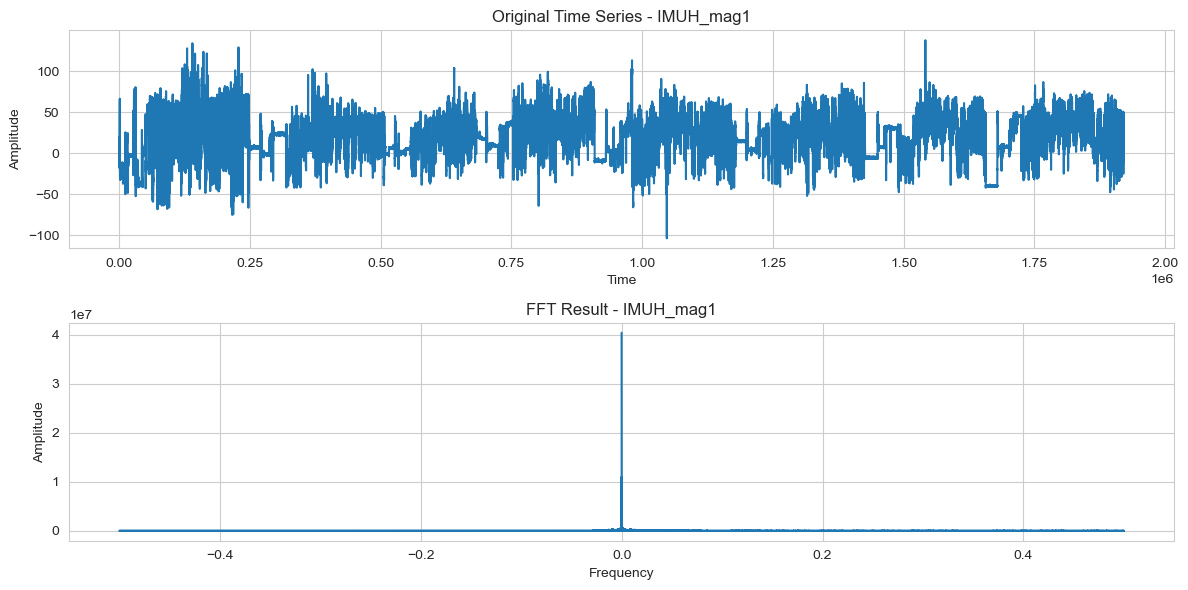

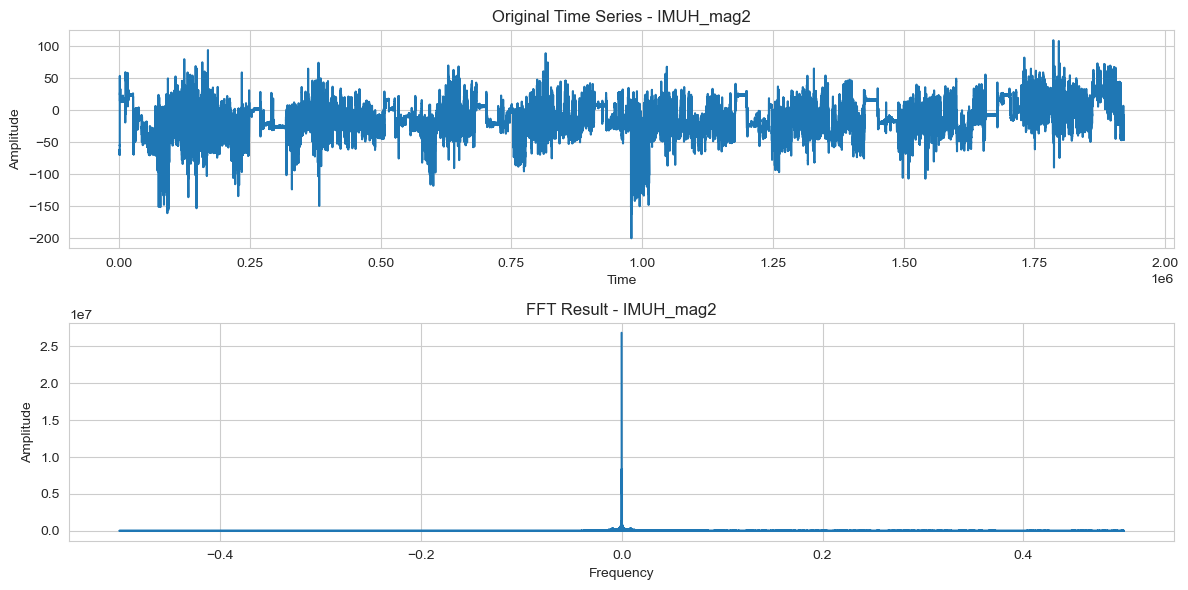

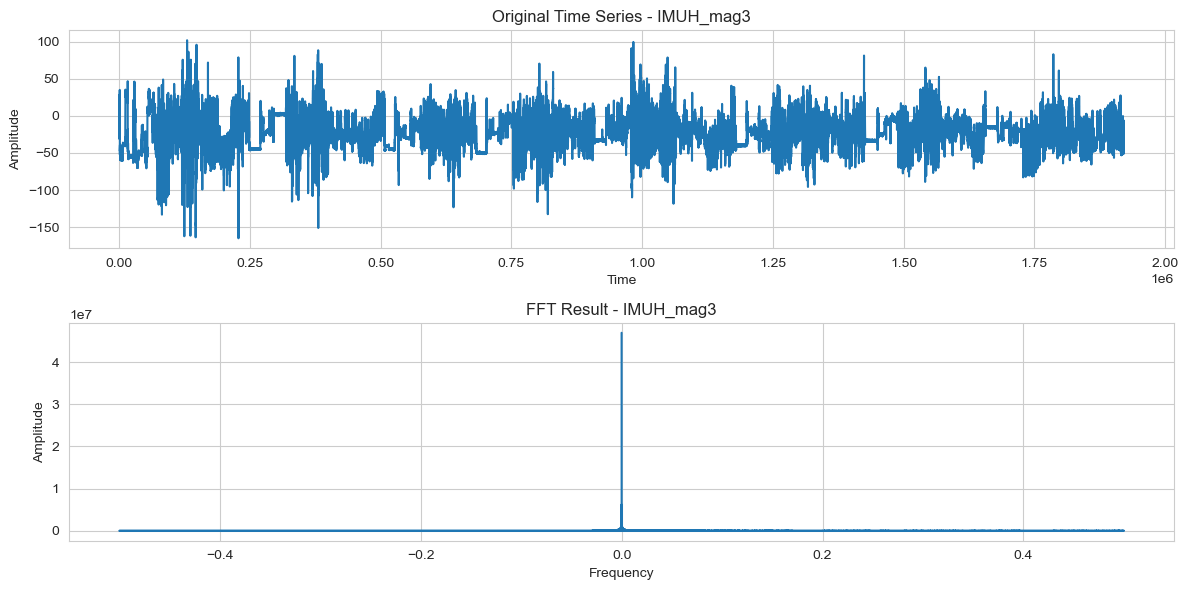

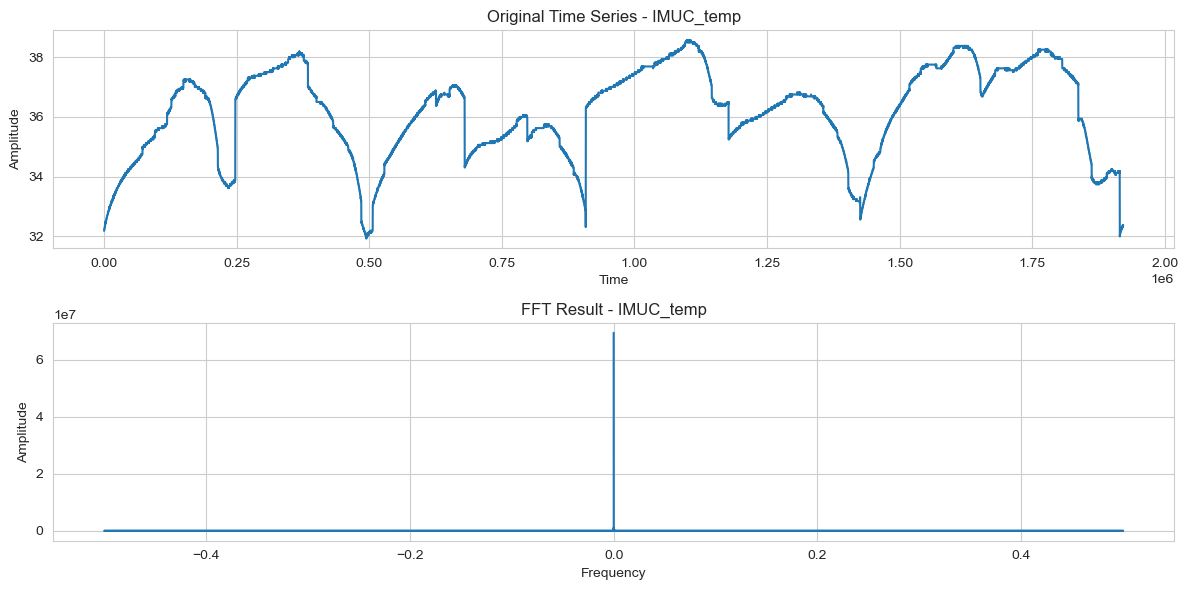

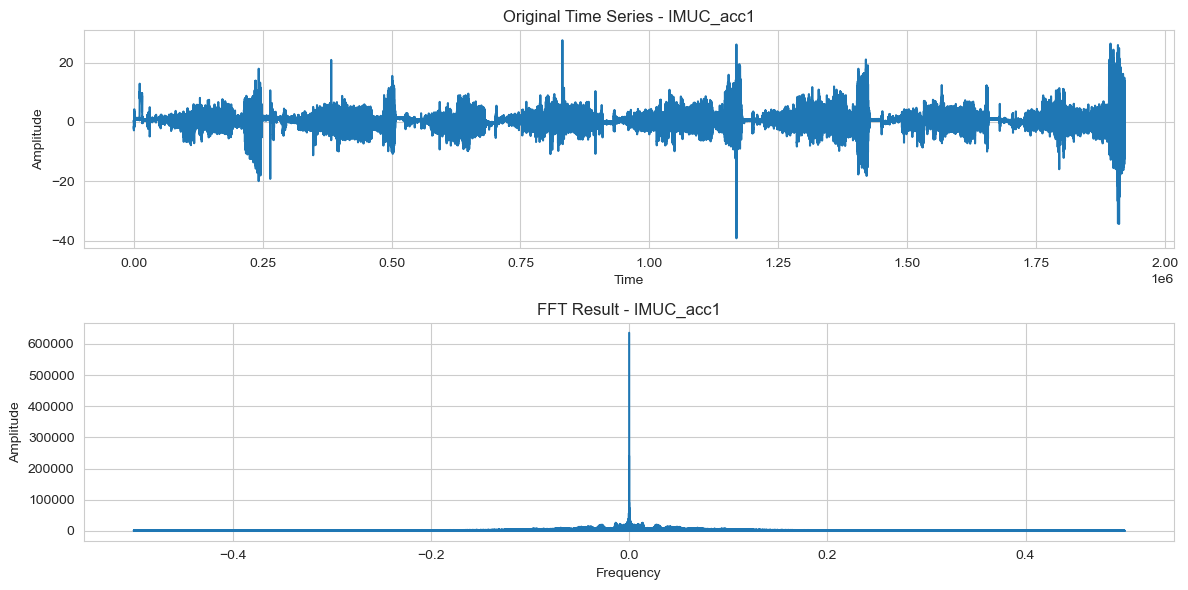

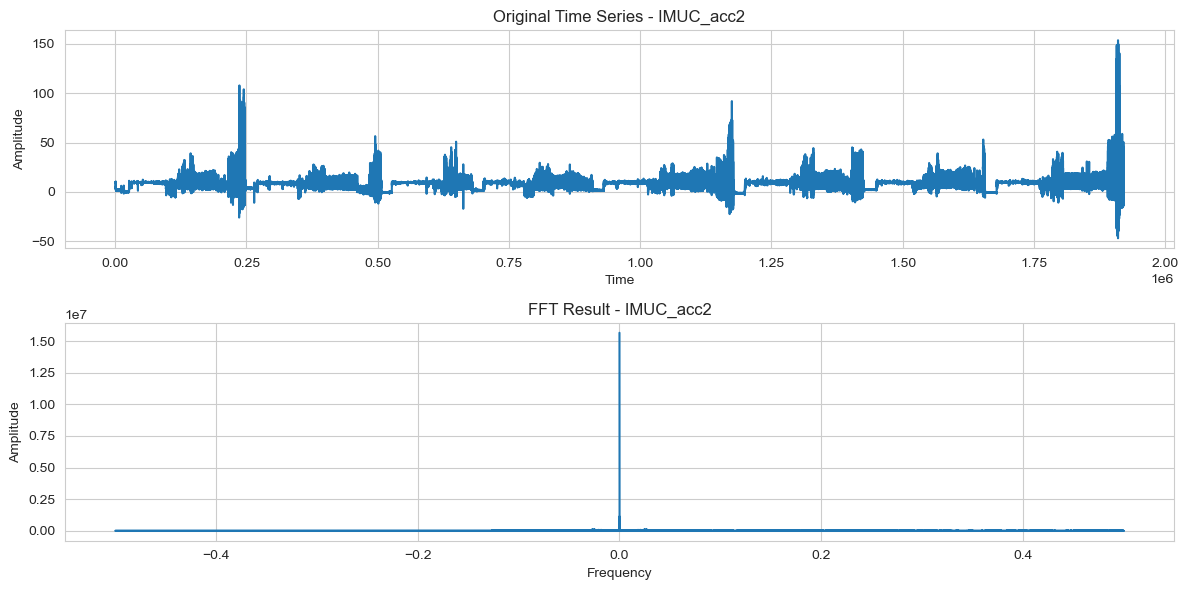

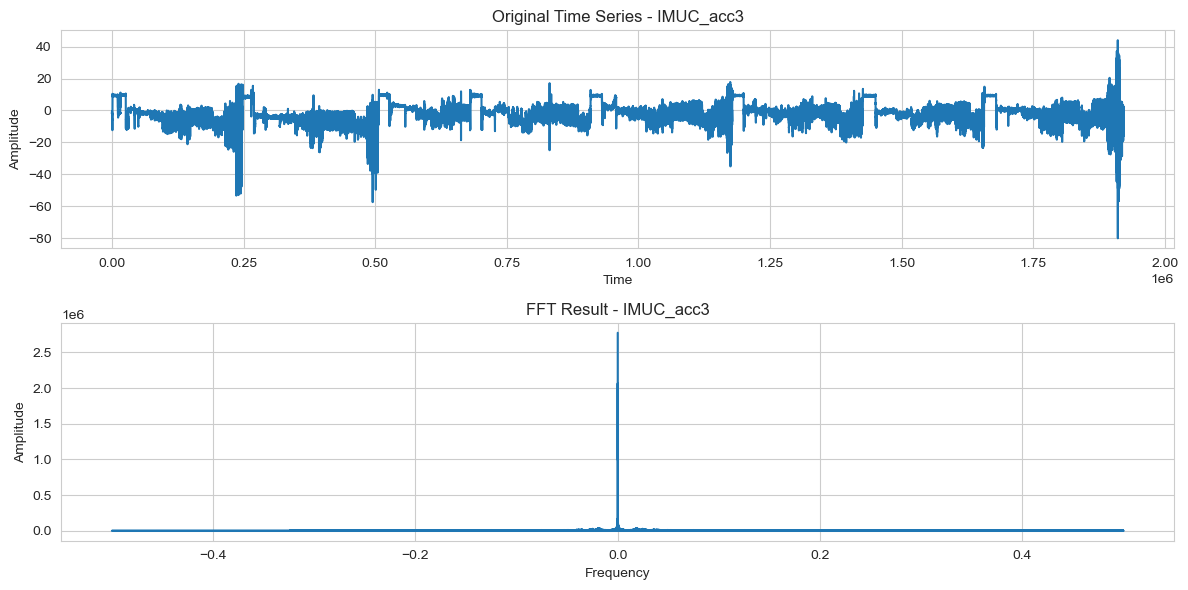

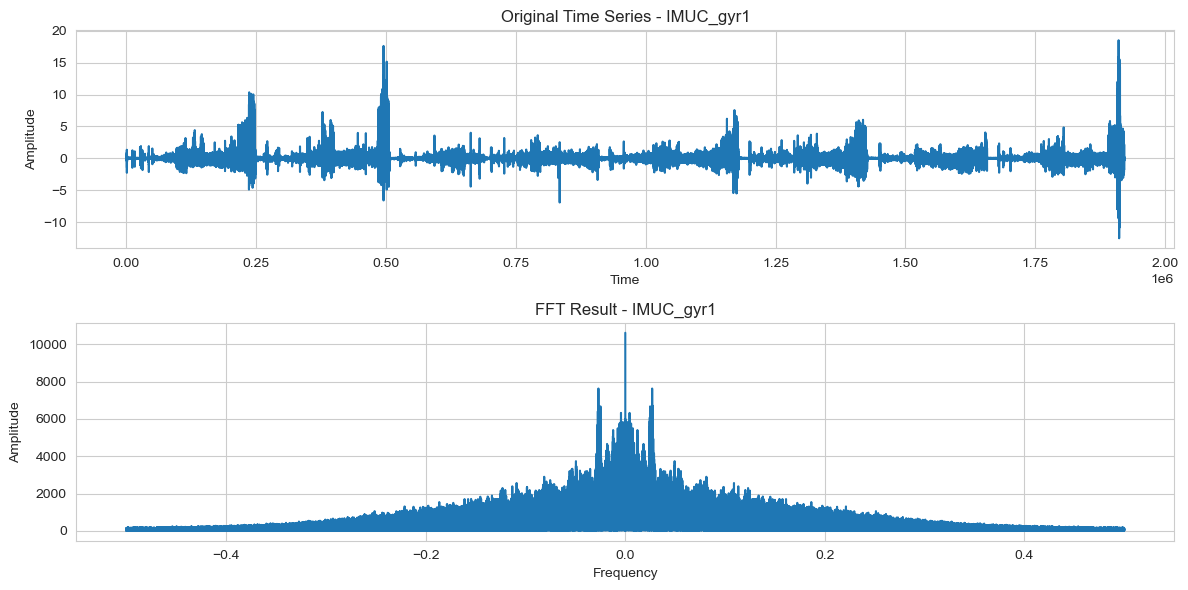

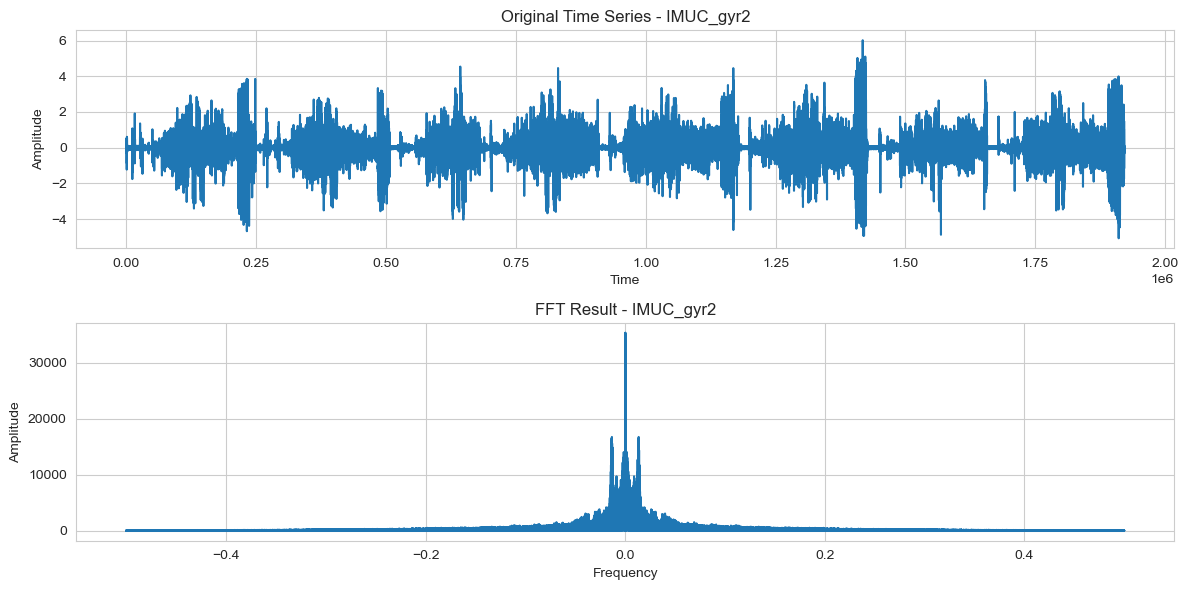

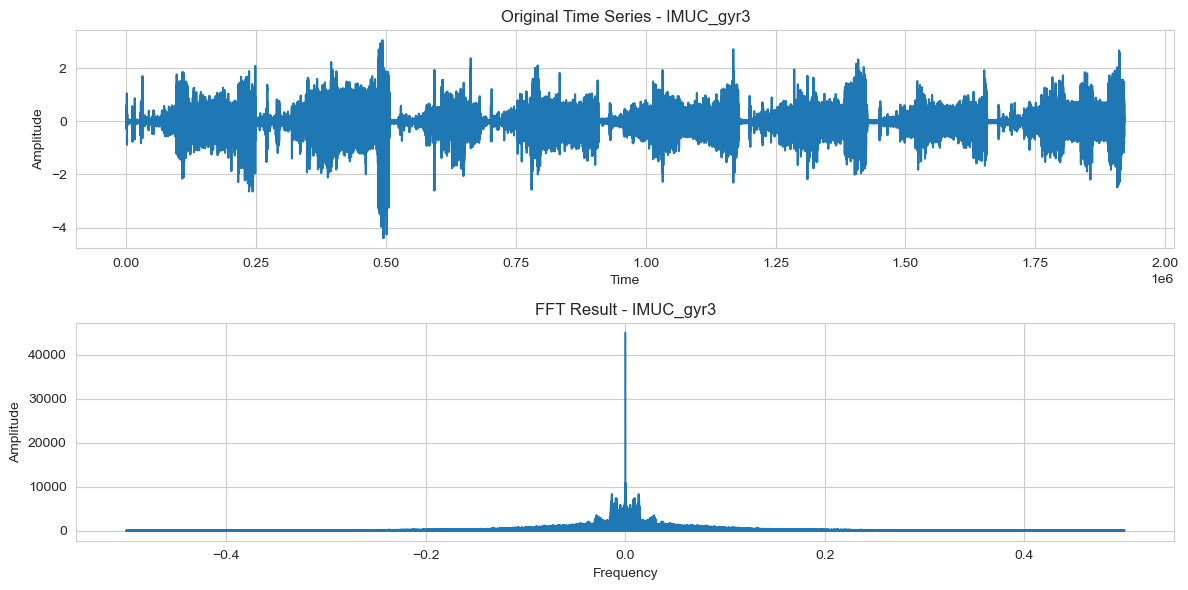

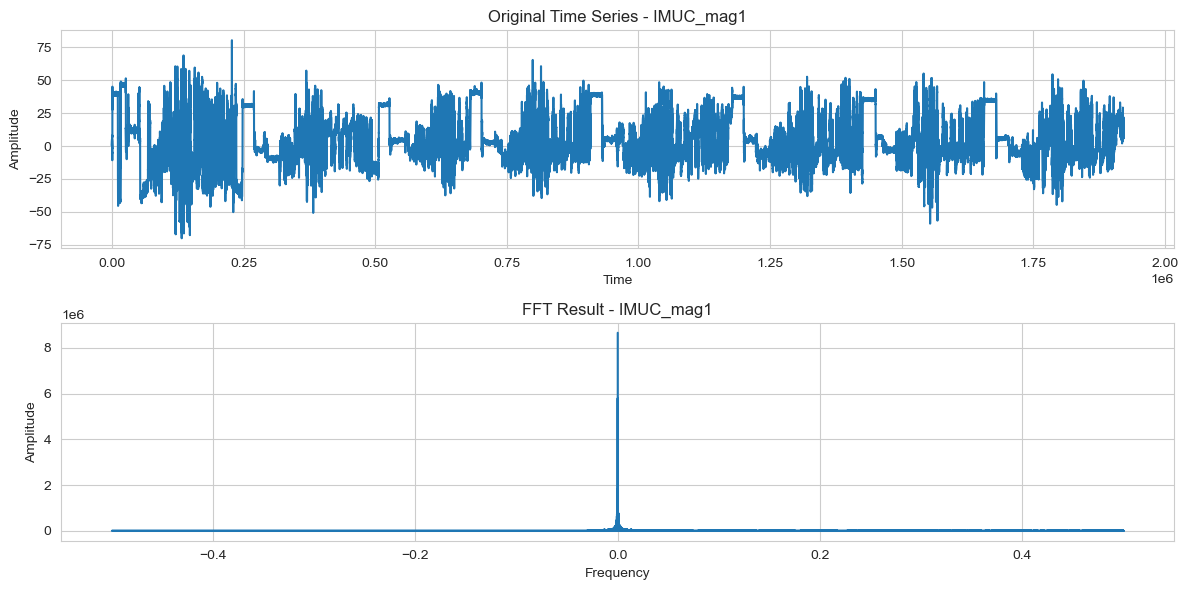

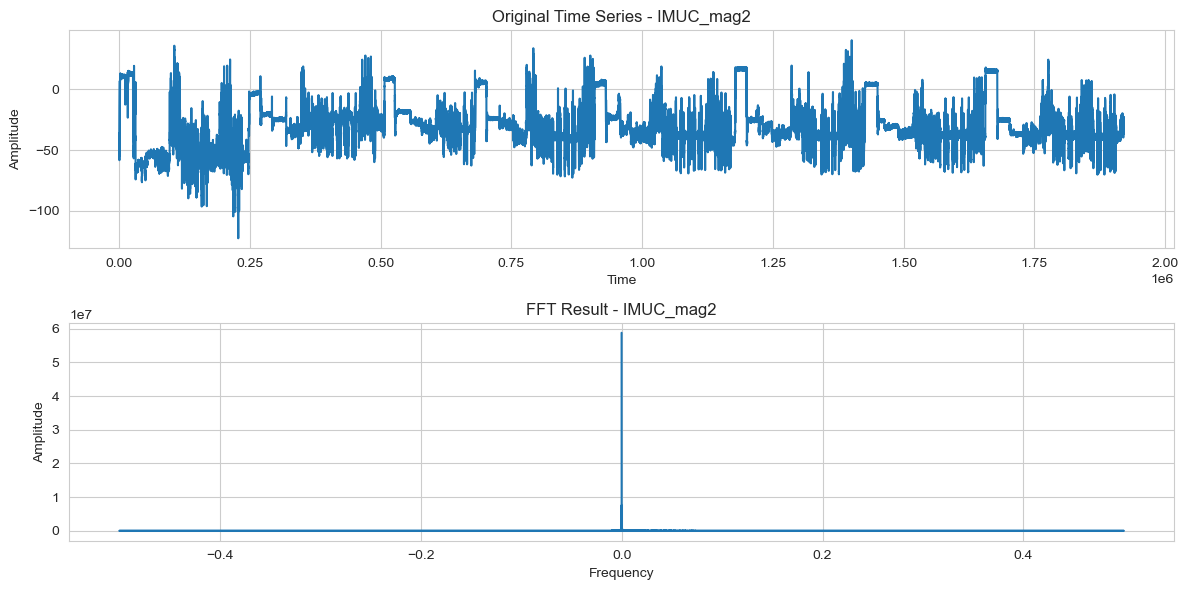

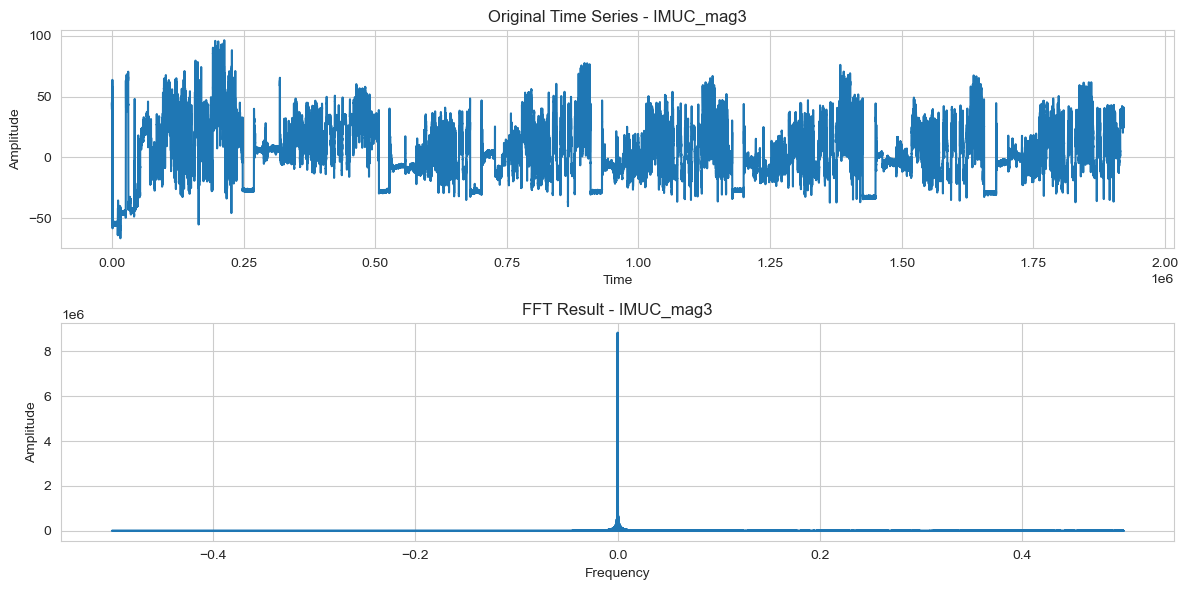

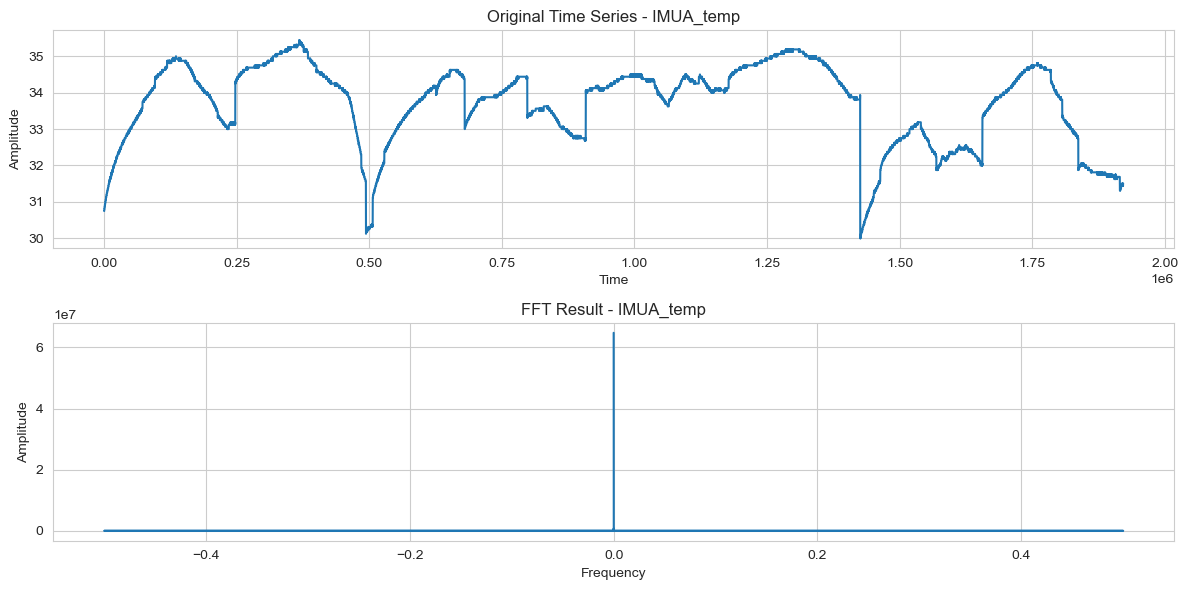

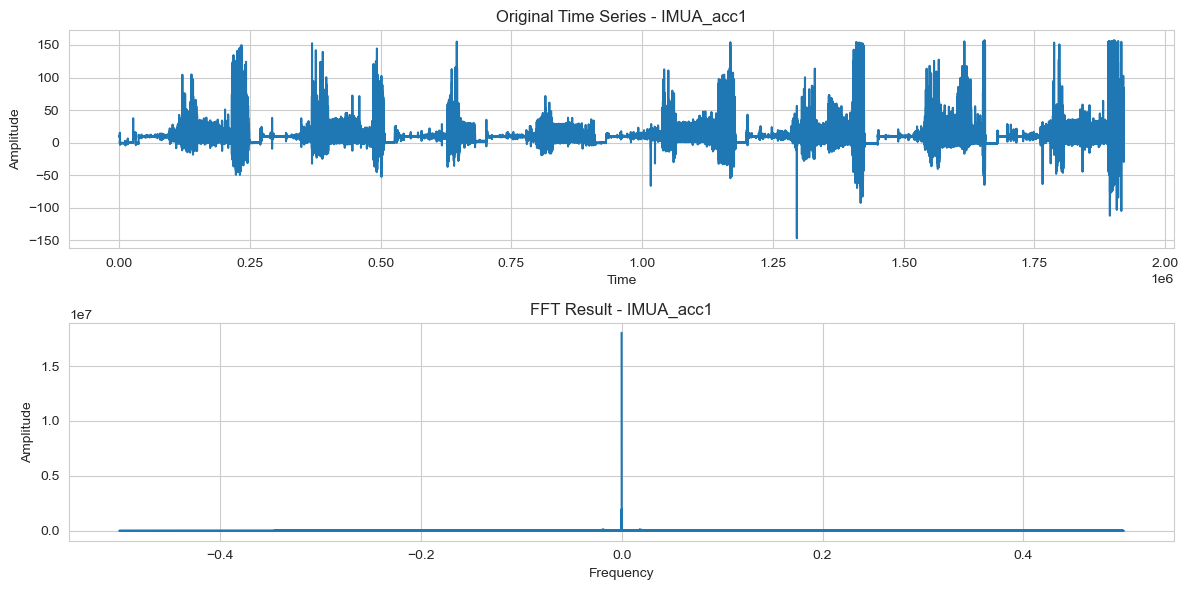

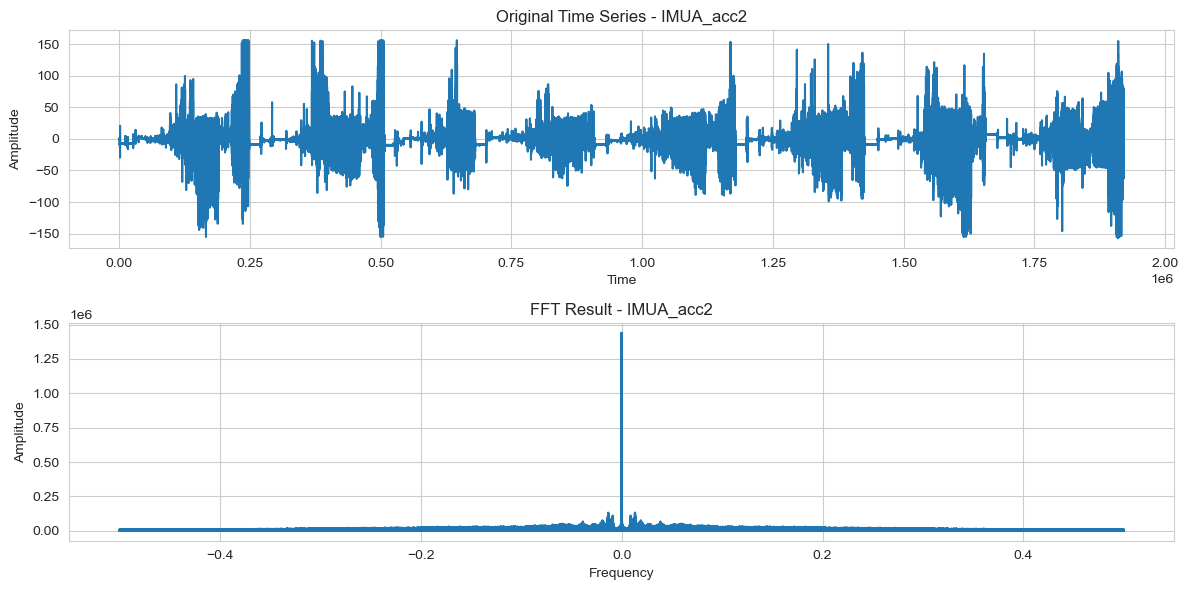

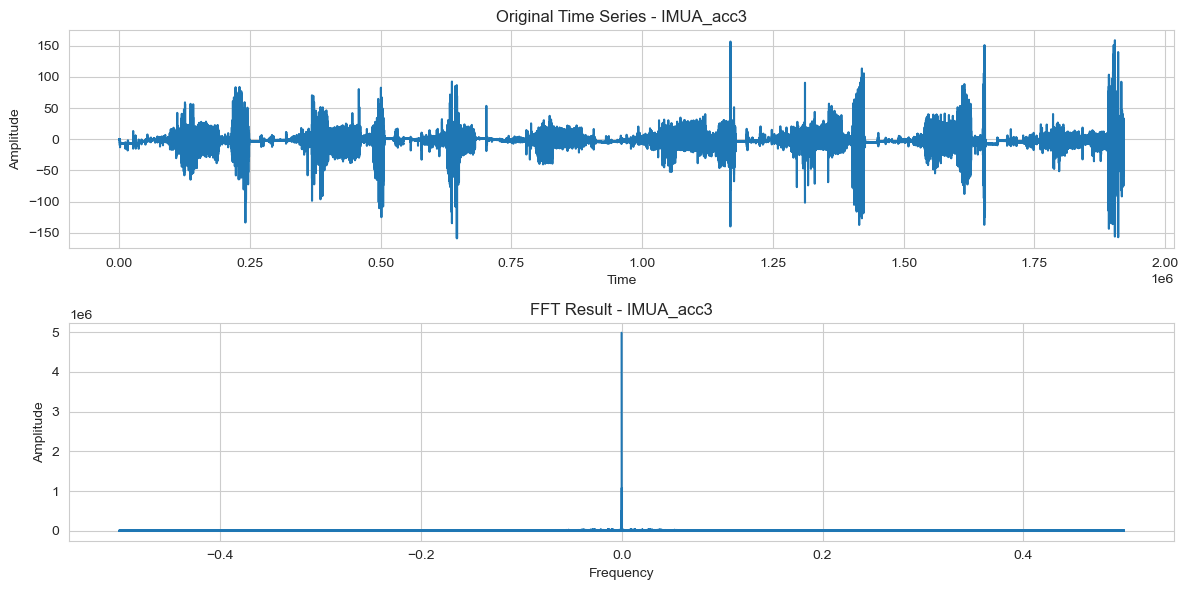

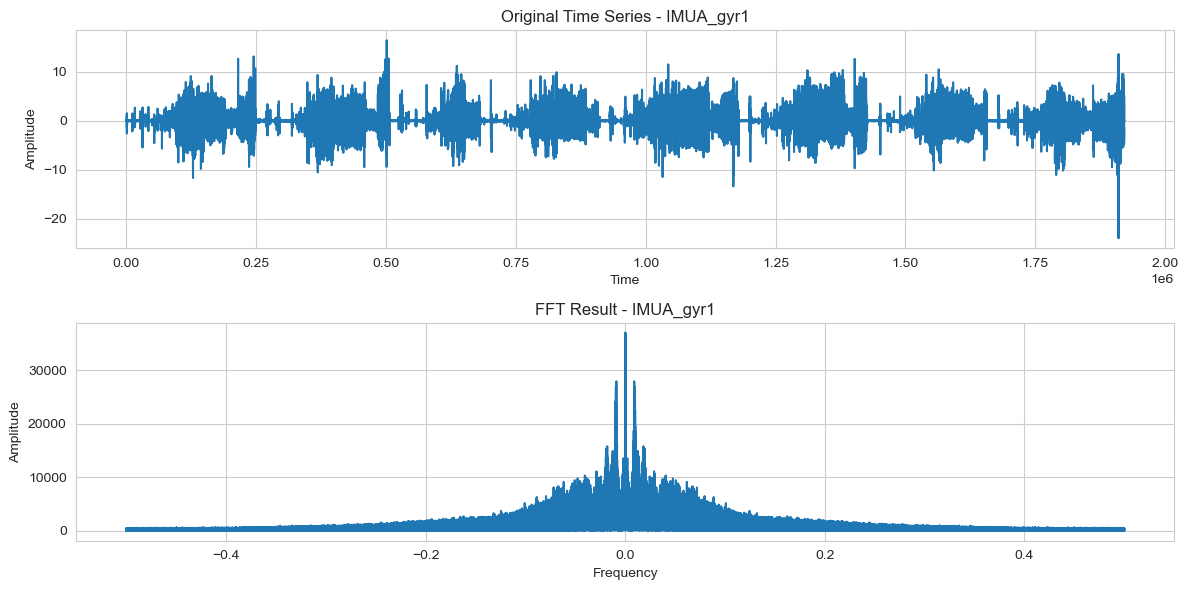

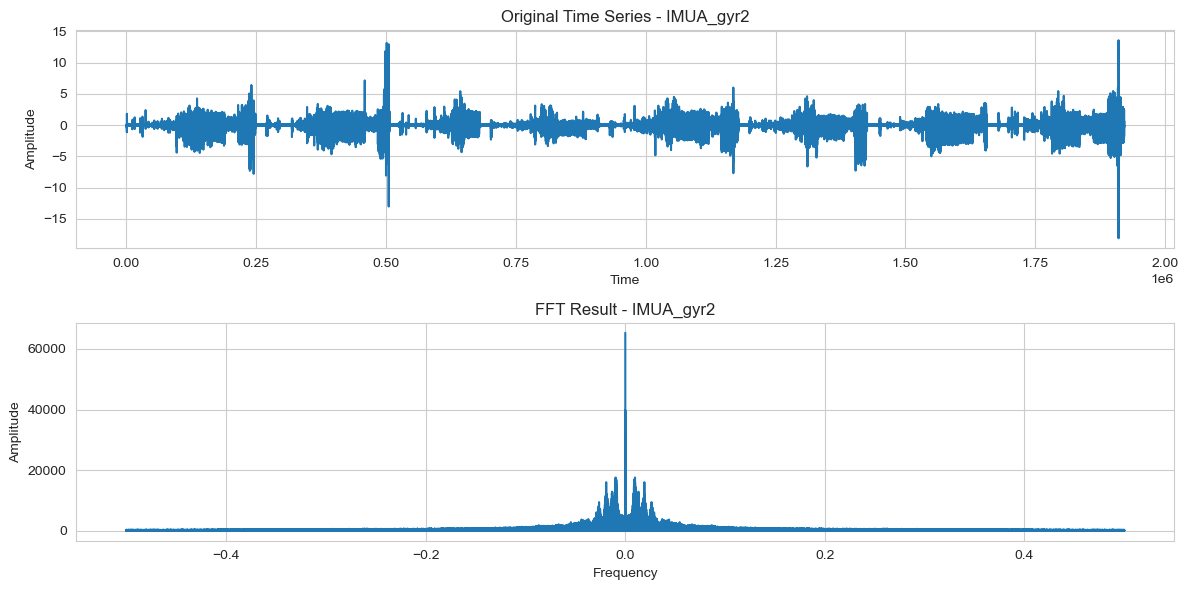

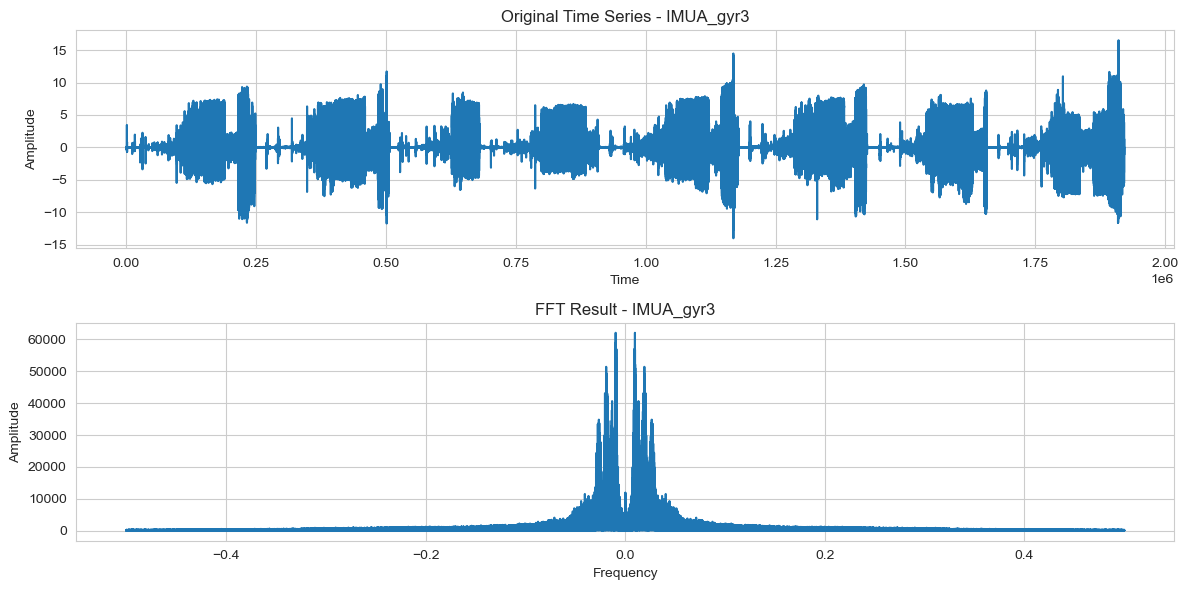

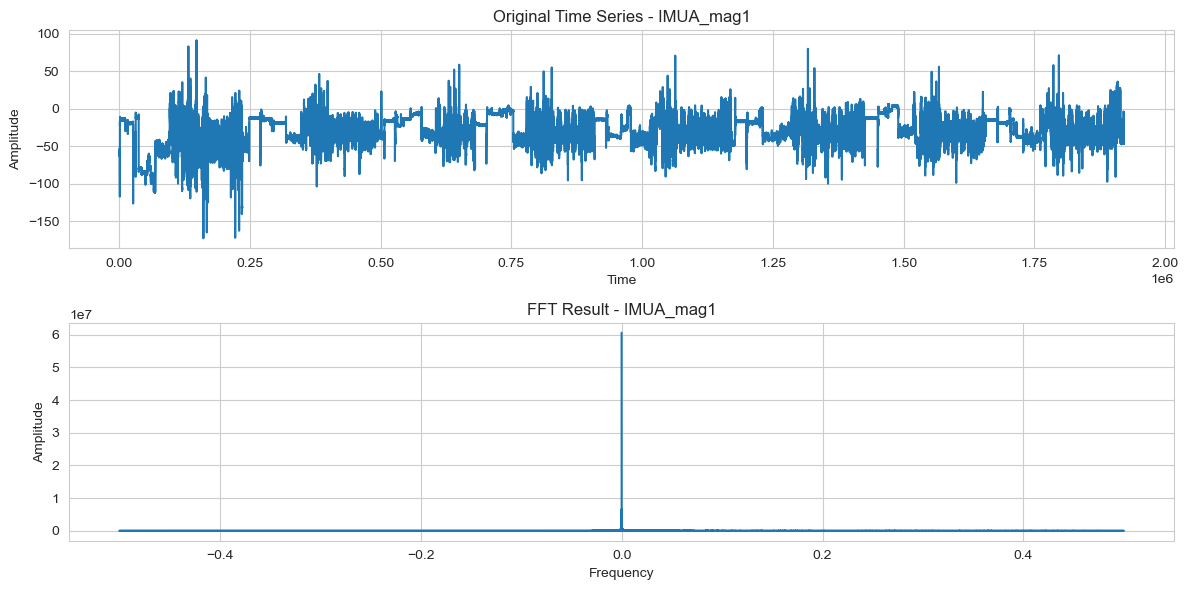

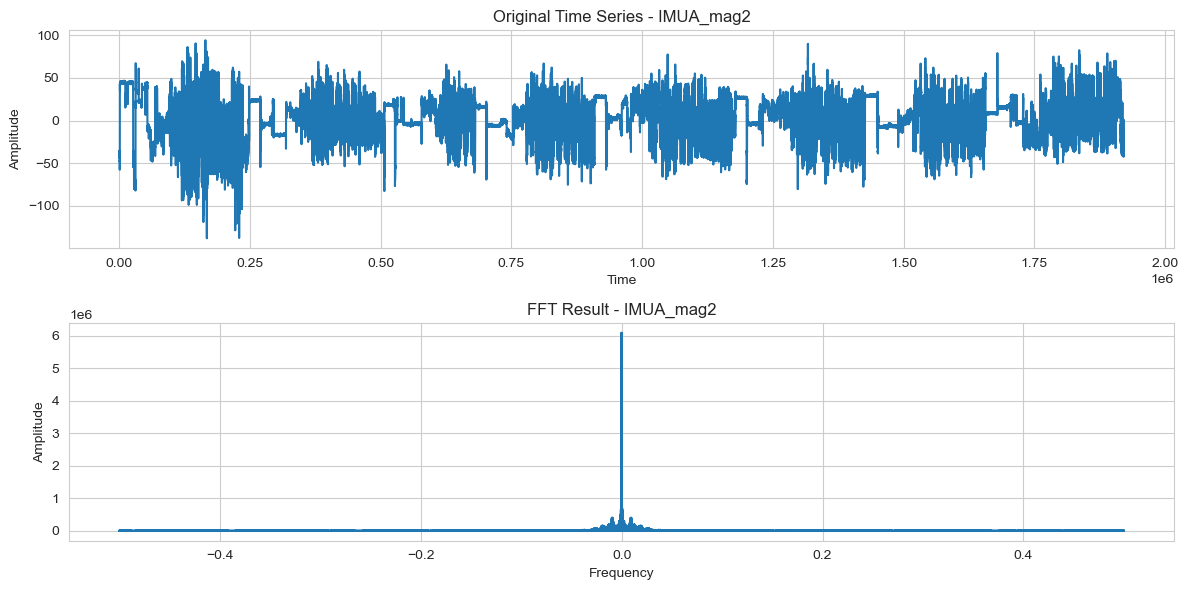

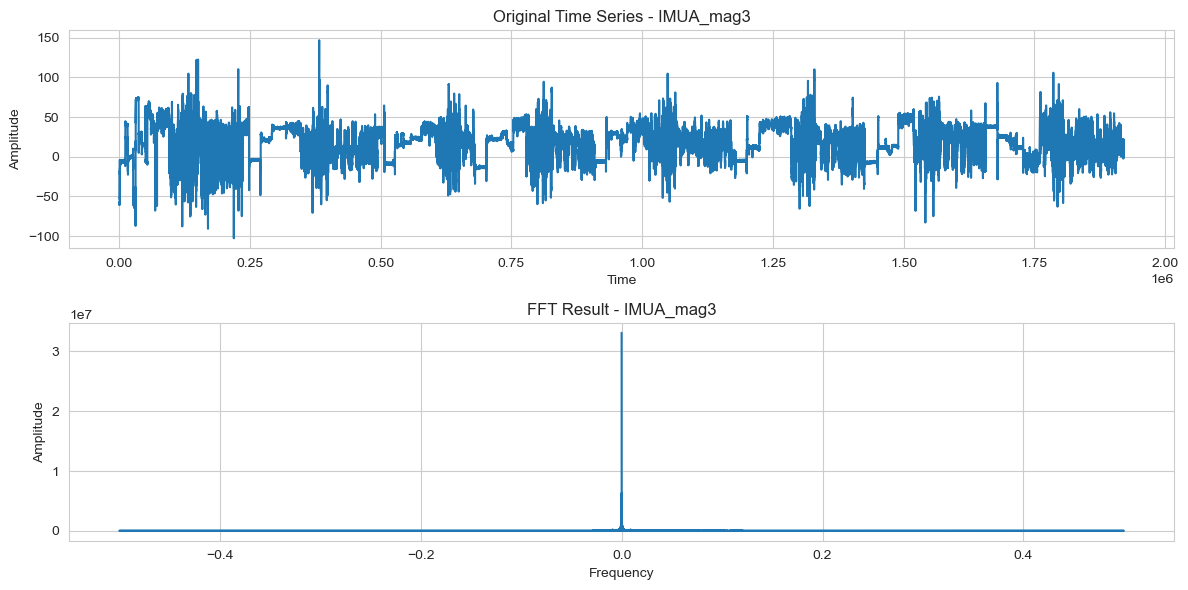

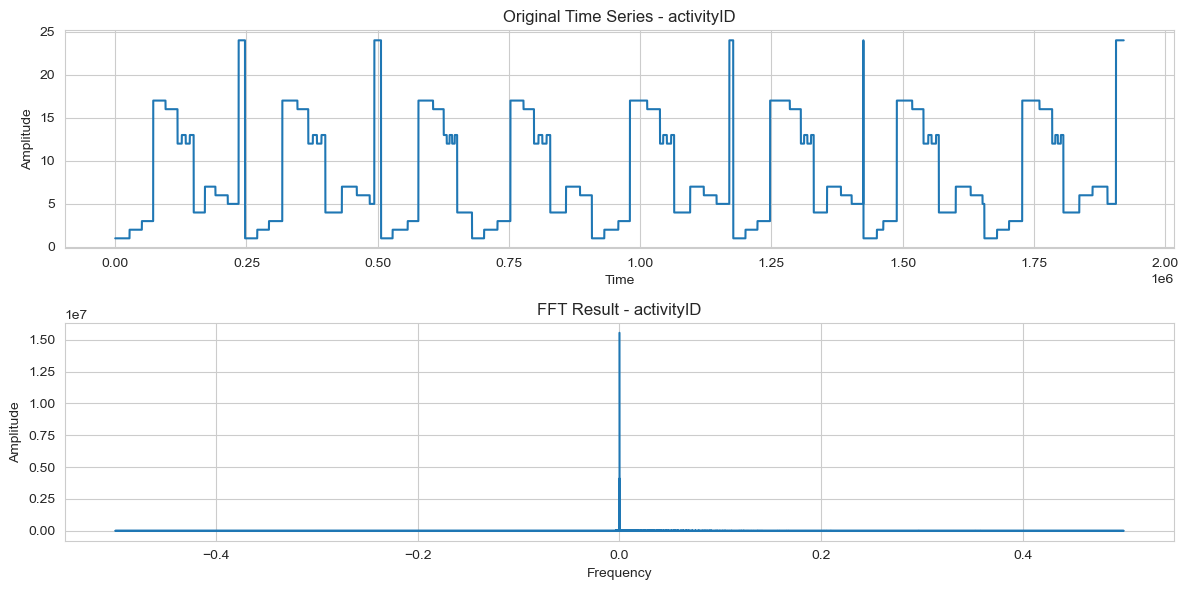

In [12]:
# Iterate over each time series column in the DataFrame
for column in df2.columns:
    time_series = df2[column]

    # Compute the FFT
    fft_result = np.fft.fft(time_series)
    frequencies = np.fft.fftfreq(len(fft_result))

    # Plot the original time series
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(time_series)), time_series)
    plt.title(f'Original Time Series - {column}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # Plot the FFT result
    plt.subplot(2, 1, 2)
    plt.plot(frequencies, np.abs(fft_result))
    plt.title(f'FFT Result - {column}')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

### FFT - smoothing

In [13]:
def smooth_data(time_series, window_size):                             # Function to apply moving average to a time series
    return time_series.rolling(window=window_size, center=True).mean()
    time_series = df2[column]
    window_size = 500 # Adjust the window size based on your data and  # Apply moving average to smooth the data
    order=200
    smoothed_series = smooth_data(time_series, window_size)    
    fft_result_original = np.fft.fft(time_series)                      # Compute the FFT for both the original and smoothed time series
    fft_result_smoothed = np.fft.fft(smoothed_series)
    frequencies = np.fft.fftfreq(len(fft_result_original))
    plt.figure(figsize=(12, 8))                                         # Plot the original and smoothed time series
    plt.subplot(3, 1, 1)
    plt.plot(np.arange(len(time_series)), time_series)
    plt.title(f'Original Time Series - {column}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(3, 1, 2)
    plt.plot(np.arange(len(smoothed_series)), smoothed_series, color='orange')
    plt.title(f'Smoothed Time Series - {column}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.subplot(3, 1, 3)                                                 # Plot the FFT result for both the original and smoothed time series
    plt.plot(frequencies, np.abs(fft_result_original), label='Original')
    plt.plot(frequencies, np.abs(fft_result_smoothed), label='Smoothed', color='orange')
    plt.title(f'FFT Result - {column}')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.tight_layout()
    plt.show()